# Lensing windows
Calculate the lensing window functions for different source/lens combinations. These can be found in Merkel2017.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import *
%matplotlib inline

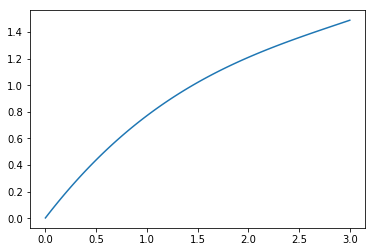

In [2]:
#The cosmology
h = 0.7 #km/s/Mpc/100
Om = 0.3
DH = 3001/h #Hubble distance in Mpc

def Einv(z):
    Od = 1.-Om
    return 1./np.sqrt(Om*(1+z)**3 + Od)

def Hz(z):
    return h*100/Einv(z) #Mpc/km/s

def n(z):
    return z**2*np.exp(-(z/0.64)**1.5)

zmin, zmax = 0, 3
z = np.linspace(zmin, zmax, 100)
chis = np.array([quad(Einv, 0, zi)[0] for zi in z])
chi = UnivariateSpline(z, chis)

plt.plot(z, [chi(zi) for zi in z])

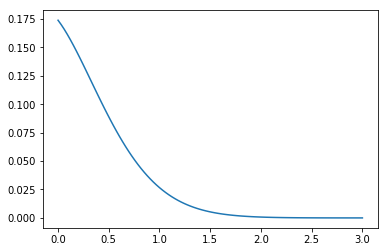

In [3]:
#Let's pretend that the comoving density of all sources is 1, so n=1
def G_integrand(zp, z):
    return n(zp)*(1-chi(z)/chi(zp))

W_G = np.array([(1+zi)*quad(G_integrand,zi,zmax,args=(zi,))[0] for zi in z])
plt.plot(z, W_G)